# Latar Belakang

Tindak kejahatan atau kriminalitas merupakan suatu tindakan antisosial 
yang melanggar hukum, berkaitan dengan merampas hak milik orang lain dan 
dapat menimbulkan suatu kerugian, ketidaknyamanan, dan ketidakpatutan
dalam bermasyarakat (Soerjono dalam Saraswati, 1999). Hal ini dapat 
menimbulkan berbagai macam kerugian bagi seseorang yang menjadi korban, 
baik dari segi materil (ekonomis) maupun dari segi immaterial seperti 
hilangnya rasa aman, nyaman, dan tentram dalam kehidupan bermasyarakat 
(Maslichah, 2012). Tindak kejahatan dapat muncul karena disebabkan oleh 
berbagai faktor, yaitu faktor personal, faktor sosial, dan faktor situasional yang mendorong pelaku untuk melakukan kejahatan (Separovic dalam Weda, 1996), 
dengan kata lain faktor lingkungan sangat berpengaruh (Davidson, 1981).

Kali ini saya akan mencoba mencari insight atau informasi dari laporan data kejahatan di kota Boston.Boston sendiri merupakan ibu kota dan kota terbesar di Massachusetts di Amerika Serikat. Kota ini salah satu kota tertua dan terkaya di A.S dengan luas wilayah sekitar 232,1 km² dan memiliki jumlah penduduk lebih dari 600 ribu jiwa.Data ini merupakan data resmi yang dicatat oleh Boston Police Department dari tahun 2015 sampai tahun 2018.


## Pernyataan Masalah
Tujuan utama pengumpulan data tindak kejahatan adalah untuk mengenali pola suatu tindakan kriminal agar dapat diantisipasi dan dicegah dimasa depan.

Sebagai seorang *data analyst*, untuk mengenali suatu pola tindakan kriminal dari laporan data kejahatan di kota Boston yang kita miliki, maka kita perlu menjawab beberapa pertanyaan berikut:
1. Kejahatan apa saja yang sering terjadi di kota boston?
2. Di distrik manakah yang paling banyak terjadi tindakan kejahatan? sehingga harus mendapatkan perhatian khusus dari Departemen Kepolisian di Boston.
3. Kapan biasanya tindak kejahatan sering terjadi? sehingga Departemen Kepolisian di Boston dapat melakukan patroli di jam-jam tersebut.



# Data Understanding and Cleaning

Untuk menjawab pertanyaan di atas, kita akan menganalisa data laporan data kejahatan di kota boston yang sudah dikumpulkan oleh Departemen Kepolisian di boston. Dataset dapat diakses [disini](https://drive.google.com/drive/folders/1uPzXi8Qkf_lSxs7UbTAANxZwGe2PzREm).

Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi dari dataset *crime*.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Dataset ini berisi informasi terkait dataset yang berisi catatan dari laporan insiden kriminal terbaru dari Juni tahun 2015 hingga September tahun 2018 yang mengklasifikasikan jenis insiden serta memberikan informasi tentang waktu dan lokasi geografis dari insiden tersebut.
Terdapat 17 kolom di dalam dataset crime, yaitu:


1. `INCIDENT_NUMBER` : Nomor berkas yang terdaftar di kepolisian
2. `OFFENSE_CODE`: Kode Kejahatan
3. `OFFENSE_CODE_GROUP`: Nama tindak kejahatan
4. `OFFENSE_DESCRIPTION`: Nama kejahatan yang lebih spesifik
5. `DISTRICT`: District di boston
6. `REPORTING_AREA`:kantor polisi tempat kejahatan dilaporkan
7. `SHOOTING`: "Y" menunjukkan terjadi kasus penembakan.
8. `OCCURRED_ON_DATE`/`YEAR`/`MONTH`/`DAY_OF_WEEK`/`HOUR`: Waktu teradi tindak kejahatan
9. `UCR_PART`: Tingkat kejahatan, Part 1 adalah tindak kejahatan paling berat
10. `STREET`/`LATITUDE`/`LONGITUDE`/`LOCATION`: Tempat terjadinya kejahatan







In [ ]:
df = pd.read_excel('drive/MyDrive/Colab Notebooks/crime.xlsx')
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)"
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)"
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)"
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)"
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)"


In [ ]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (319073, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319073 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319073 non-null  object        
 1   OFFENSE_CODE         319073 non-null  int64         
 2   OFFENSE_CODE_GROUP   319073 non-null  object        
 3   OFFENSE_DESCRIPTION  319073 non-null  object        
 4   DISTRICT             317308 non-null  object        
 5   REPORTING_AREA       319073 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319073 non-null  datetime64[ns]
 8   YEAR                 319073 non-null  int64         
 9   MONTH                319073 non-null  int64         
 10  DAY_OF_WEEK          319073 non-null  object        
 11  HOUR                 319073 non-null  int64         
 12  UCR_PART       

In [ ]:
display(df.describe(), df.describe(include='object'))

,OFFENSE_CODE,YEAR,MONTH,HOUR,Lat,Long
count,319073.000000,319073.000000,319073.000000,319073.000000,299074.000000,299074.000000
mean,2317.546956,2016.560586,6.609719,13.118205,42.214381,-70.908272
std,1185.285543,0.996344,3.273691,6.294205,2.159766,3.493618
min,111.000000,2015.000000,1.000000,0.000000,-1.000000,-71.178674
25%,1001.000000,2016.000000,4.000000,9.000000,42.297442,-71.097135
50%,2907.000000,2017.000000,7.000000,14.000000,42.325538,-71.077524
75%,3201.000000,2017.000000,9.000000,18.000000,42.348624,-71.062467
max,3831.000000,2018.000000,12.000000,23.000000,42.395042,-1.000000


,INCIDENT_NUMBER,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,DAY_OF_WEEK,UCR_PART,STREET,Location
count,319073,319073,319073,317308,319073,1019,319073,318983,308202,319073
unique,282517,67,244,12,879,1,7,4,4657,18194
top,I162030584,Motor Vehicle Accident Response,SICK/INJURED/MEDICAL - PERSON,B2,,Y,Friday,Part Three,WASHINGTON ST,"(0.00000000, 0.00000000)"
freq,13,37132,18783,49945,20250,1019,48495,158553,14194,19999


In [ ]:
pd.set_option('display.max_colwidth', -1)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,INCIDENT_NUMBER,282517,"[I182070945, I182070943, I182070941, I182070940, I182070938, I182070936, I182070933, I182070932, I182070931, I182070929, I182070928, I182070927, I182070923, I182070922, I182070921, I182070920, I182070919, I182070918, I182070917, I182070915, I182070913, I182070911, I182070910, I182070909, I182070908, I182070906, I182070905, I182070904, I182070903, I182070901, I182070900, I182070898, I182070897, I182070895, I182070893, I182070892, I182070891, I182070890, I182070889, I182070888, I182070887, I182070886, I182070885, I182070882, I182070881, I182070880, I182070879, I182070877, I182070876, I182070875, I182070874, I182070873, I182070872, I182070871, I182070870, I182070868, I182070866, I182070865, I182070863, I182070862, I182070861, I182070860, I182070859, I182070858, I182070857, I182070856, I182070855, I182070854, I182070852, I182070851, I182070850, I182070849, I182070847, I182070846, I182070844, I182070843, I182070842, I182070841, I182070840, I182070839, I182070838, I182070837, I182070836, I182070835, I182070834, I182070833, I182070832, I182070831, I182070830, I182070829, I182070828, I182070827, I182070826, I182070825, I182070824, I182070823, I182070822, I182070820, I182070819, I182070818, ...]"
1,OFFENSE_CODE,222,"[619, 1402, 3410, 3114, 3820, 724, 3301, 301, 3108, 2647, 3201, 3006, 3305, 614, 3801, 3803, 522, 3831, 802, 2007, 2900, 2907, 2629, 2662, 3207, 613, 3109, 2612, 1843, 3125, 1841, 3802, 3018, 2405, 617, 3625, 3106, 3501, 3115, 616, 3807, 1102, 1849, 2905, 1810, 1842, 1806, 1848, 1844, 423, 3205, 413, 1501, 3001, 3830, 561, 2914, 2610, 1109, 706, 2403, 3160, 900, 801, 3002, 520, 2648, 670, 615, 3116, 1504, 1830, 361, 2006, 311, 1001, 3810, 2401, 2646, 3821, 3811, 3007, 2660, 1831, 3119, 3170, 1874, 3112, 3502, 735, 612, 560, 381, 3402, 1815, 1107, 2101, 1106, 3202, 1503, ...]"
2,OFFENSE_CODE_GROUP,67,"[Larceny, Vandalism, Towed, Investigate Property, Motor Vehicle Accident Response, Auto Theft, Verbal Disputes, Robbery, Fire Related Reports, Other, Property Lost, Medical Assistance, Assembly or Gathering Violations, Larceny From Motor Vehicle, Residential Burglary, Simple Assault, Restraining Order Violations, Violations, Harassment, Ballistics, Property Found, Police Service Incidents, Drug Violation, Warrant Arrests, Disorderly Conduct, Property Related Damage, Missing Person Reported, Investigate Person, Fraud, Aggravated Assault, License Plate Related Incidents, Firearm Violations, Other Burglary, Arson, Bomb Hoax, Harbor Related Incidents, Counterfeiting, Liquor Violation, Firearm Discovery, Landlord/Tenant Disputes, Missing Person Located, Auto Theft Recovery, Service, Operating Under the Influence, Confidence Games, Search Warrants, License Violation, Commercial Burglary, HOME INVASION, Recovered Stolen Property, Offenses Against Child / Family, Prostitution, Evading Fare, Prisoner Related Incidents, Homicide, Embezzlement, Explosives, Criminal Harassment, Phone Call Complaints, Aircraft, Biological Threat, Manslaughter, Gambling, INVESTIGATE PERSON, HUMAN TRAFFICKING, HUMAN TRAFFICKING - INVOLUNTARY SERVITUDE, Burglary - No Property Taken]"
3,OFFENSE_DESCRIPTION,244,"[LARCENY ALL OTHERS, VANDALISM, TOWED MOTOR VEHICLE, INVESTIGATE PROPERTY, M/V ACCIDENT INVOLVING PEDESTRIAN - INJURY, AUTO THEFT, VERBAL DISPUTE, ROBBERY - STREET, FIRE REPORT - HOUSE, BUILDING, ETC., THREATS TO DO BODILY HARM, PROPERTY - LOST, SICK/INJURED/MEDICAL - PERSON, DEMONSTRATIONS/RIOT, LARCENY THEFT FROM MV - NON-ACCESSORY, M/V ACCIDENT - OTHER, M/V ACCIDENT - PERSONAL INJURY, BURGLARY - RESIDENTIAL - NO FORCE, M/V - LEAVING SCENE - PROPERTY DAMAGE, ASSAULT SIMPLE - BATTERY, VIOL. OF RESTRAINING ORDER W NO ARREST, VAL - VIOLATION OF AUTO LAW - OTHER, VAL - OPERATING AFTER REV/SUSP., HARASSMENT, BALLISTICS EVIDENCE/FOUND, PROPERTY - FOUND, LARCENY SHOPLIFTING, SERVICE TO OTHER PD INSIDE OF MA., FIRE REPORT/ALARM - FALSE, DRUGS - POSS CLASS B - INTENT TO MFR DIST DISP, WARRANT

Dari gambar diatas, kita bisa mengetahui bahwa data kita secara umum:
1. memiliki 319073 baris dan 17 kolom dan kita juga dapat mengetahui tipe data dari tiap tiap kolom.
2. Terdapat beberapa kolom memiliki *missing value* yaitu kolom `DISTRICT`, `SHOOTING`, `UCR_PART`, `STREET`, `LAT`, `LONG` dan `LOCATION`.Selain itu kita juga dapat mengetahui tipe data dari tiap tiap kolom.
3. `INCIDENT_NUMBER` seharusnya berisikan nomer unik untuk tiap berkas yg terdaftar di kepolisian, namun dari tabel no.5 dapat kita lihat bahwa terdapat *duplicat value* pada `INCIDENT_NUMBER`, setelah dilakukan pengecekan terdapat *duplicat value* yang identik disemua kolom dan terdapat pula *duplicat value* yang memiliki `OFFENSE_CODE` yang berbeda. sehingga saya akan menambah satu kolom menggabungkan `INCIDENT_NUMBER` dan `OFFENSE_CODE`, *duplicat value* dari kolom tersebut akan di hapus dari dataset.
4. Pada *Missing value* kolom `SHOOTING` akan diisi "N" dengan asumsi bahwa "N" berarti tidak ada kasus penembakan, dimana pada penjelasan sebelumnya "Y" berarti menunjukkan adanya kasus penembakan.
6. Pada kolom `Lat`/`Long`, saya akan mengubah data -1 menjadi NAN, kemudian akan menghapus *missing value* yang terdapat pada kolom `lat` `long` tersebut, karena *missing value*nya masih relatif kecil yaitu hanya sebesar 6,5% dari total data.

### Duplicat Value

Seperti penjelasan sebelumnya,terdapat *duplicat value* pada `INCIDENT_NUMBER` yang memilik nilai identik disemua kolom, akan dihapus dari data set.

In [ ]:
#Memuat kolom baru untuk mengecek duplikasi
df ['Cek_duplicat'] = df['INCIDENT_NUMBER'].astype(str) + df['OFFENSE_CODE'].astype(str)
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,Cek_duplicat
0,I182070945,619,Larceny,LARCENY ALL OTHERS,D14,808,NaN,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",I182070945619
1,I182070943,1402,Vandalism,VANDALISM,C11,347,NaN,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.060300,"(42.30682138, -71.06030035)",I1820709431402
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,D4,151,NaN,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",I1820709413410
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,D4,272,NaN,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",I1820709403114
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,B3,421,NaN,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",I1820709383114


In [ ]:
df ['Cek_duplicat'].describe(include='object')

count     319073           
unique    319037           
top       I152026775-003115
freq      3                
Name: Cek_duplicat, dtype: object

Dari hasil pengecekan diketahui terdapat 36 data duplikasi yang identik disemua kolom, maka data tersebut akan di hapus dari data frame.

In [ ]:
#Menghapus data duplikasi
df.drop_duplicates(subset='Cek_duplicat', inplace=True)

In [ ]:
df['Cek_duplicat'].info()

<class 'pandas.core.series.Series'>
Int64Index: 319037 entries, 0 to 319072
Series name: Cek_duplicat
Non-Null Count   Dtype 
--------------   ----- 
319037 non-null  object
dtypes: object(1)
memory usage: 4.9+ MB


In [ ]:
#Menghapus kolom `Cek_duplikasi`, karna kolom tersebut sudah tidak dibutuhkan lagi
df.drop('Cek_duplicat', axis = 1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319037 entries, 0 to 319072
Data columns (total 17 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   INCIDENT_NUMBER      319037 non-null  object        
 1   OFFENSE_CODE         319037 non-null  int64         
 2   OFFENSE_CODE_GROUP   319037 non-null  object        
 3   OFFENSE_DESCRIPTION  319037 non-null  object        
 4   DISTRICT             317272 non-null  object        
 5   REPORTING_AREA       319037 non-null  object        
 6   SHOOTING             1019 non-null    object        
 7   OCCURRED_ON_DATE     319037 non-null  datetime64[ns]
 8   YEAR                 319037 non-null  int64         
 9   MONTH                319037 non-null  int64         
 10  DAY_OF_WEEK          319037 non-null  object        
 11  HOUR                 319037 non-null  int64         
 12  UCR_PART             318948 non-null  object        
 13  STREET        

### Missing value

In [ ]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

INCIDENT_NUMBER        0.000000 
OFFENSE_CODE           0.000000 
OFFENSE_CODE_GROUP     0.000000 
OFFENSE_DESCRIPTION    0.000000 
DISTRICT               0.553227 
REPORTING_AREA         0.000000 
SHOOTING               99.680601
OCCURRED_ON_DATE       0.000000 
YEAR                   0.000000 
MONTH                  0.000000 
DAY_OF_WEEK            0.000000 
HOUR                   0.000000 
UCR_PART               0.027896 
STREET                 3.407442 
Lat                    6.268238 
Long                   6.268238 
Location               0.000000 
dtype: float64

<Axes: >

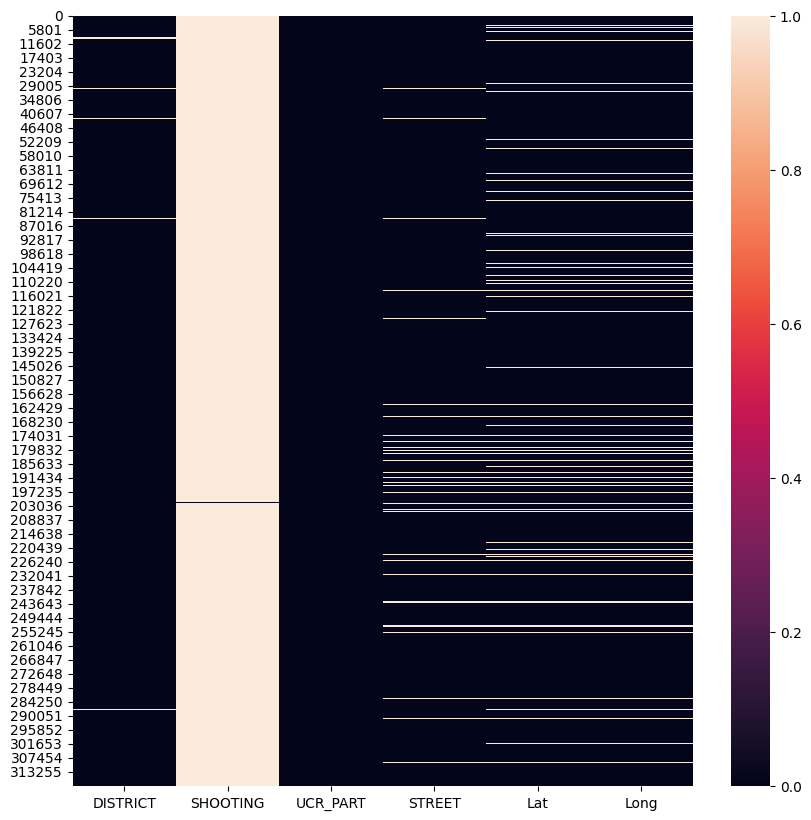

In [ ]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df[['DISTRICT','SHOOTING','UCR_PART','STREET','Lat','Long']].isna())

Secara garis besar:  
* *missing value* didalam kolom `SHOOTING` akan di isi menggunakan nilai "N" dengan asumsi bahwa "N" berarti tidak ada kasus penembakan, dimana pada penjelasan sebelumnya "Y" berarti menunjukkan adanya kasus penembakan.
* *missing value* pada `UCT_Part`
* *missing value* di kolom `lat`,`long`, dan `STREET` memiliki sebaran yang terlihat berkaitan, jika data di `lat` kosong, maka kemungkinan besar data di `long` dan disebagian kecil di kolom `STREET` juga kosong.

  
Ada 2 cara untuk menangani *missing value*:
* pertama,mengisi data yang hilang. Cara ini akan di implementasikan untuk kolom `SHOOTING`. 
* kedua, menghapus baris/kolom yang berisi *missing value*. Pada kasus ini untuk *missing value* di kolom `lat`,`long`, dan akan dihapus karena memiliki *missing value* yang relatif kecil yaitu hanya sebesar 6.2%.
 

In [ ]:
#Mengisi missing value pada kolom SHOOTING.
df['SHOOTING'].fillna(value = "N", inplace=True)

In [ ]:
# Missing value pada kolom SHOOTING sudah terisi dan tidak terdapat data yang kosong lagi di dalam kolom tersebut.
df['SHOOTING'].isna().sum()

0

In [ ]:
# sebelum menghapus colom lat,long, nilai Lat/Long yang bernilai -1 akan di replace dengan nilai Nan, karna tidak ada Lat/Long -1
df.Lat.replace(-1, None, inplace=True)
df.Long.replace(-1, None, inplace=True)

In [ ]:
#Menghapus missing value pada kolom Lat/Long
df.dropna(subset=['Lat', 'Long'],inplace=True)

In [ ]:
# persentase missing value di terdapat pada kolom
df.isna().sum()/df.shape[0]*100

INCIDENT_NUMBER        0.000000
OFFENSE_CODE           0.000000
OFFENSE_CODE_GROUP     0.000000
OFFENSE_DESCRIPTION    0.000000
DISTRICT               0.300710
REPORTING_AREA         0.000000
SHOOTING               0.000000
OCCURRED_ON_DATE       0.000000
YEAR                   0.000000
MONTH                  0.000000
DAY_OF_WEEK            0.000000
HOUR                   0.000000
UCR_PART               0.029836
STREET                 0.597062
Lat                    0.000000
Long                   0.000000
Location               0.000000
dtype: float64

Setelah dilakukan penghapusan missing value pada kolom `lat`,`long`, ternyata masih terdapat Missing value Pada kolom `DISTRICT`, `UCR_PART`, dan `STREET`. Dikarenakan jumlah missing value yang terdapat di kolom ini dibawah 10%, ketidakadaan informasi distrik, ucr_part dan nama jalan seharusnya tidak akan merubah kesimpulan yang akan ditarik. Maka dari itu, kolom ini diputuskan untuk dimasukkan value 'N/A' dikarenakan informasi pada kolom lain masih berharga untuk analisa

In [ ]:
## Mengisi data Missing Value kolom DISTRICT, UCR_PART, dan STREET
df['DISTRICT'].fillna('N/A',inplace=True)
df['STREET'].fillna('N/A',inplace=True)
df['UCR_PART'].fillna('N/A',inplace=True)

In [ ]:
# persentase missing value di terdapat pada kolom
df.isna().sum()/df.shape[0]*100

INCIDENT_NUMBER        0.0
OFFENSE_CODE           0.0
OFFENSE_CODE_GROUP     0.0
OFFENSE_DESCRIPTION    0.0
DISTRICT               0.0
REPORTING_AREA         0.0
SHOOTING               0.0
OCCURRED_ON_DATE       0.0
YEAR                   0.0
MONTH                  0.0
DAY_OF_WEEK            0.0
HOUR                   0.0
UCR_PART               0.0
STREET                 0.0
Lat                    0.0
Long                   0.0
Location               0.0
dtype: float64

### Cek Outlier
Tabel ini mempunyai 6 buah kolom numerik yang diantaranya tidak dapat dilakukan fungsi matematis. Maka dari itu, uji outliers tidak diperlukan.

# Data yang Sudah Bersih

### Menambah Kolom Baru

TIME : Mengelompokan waktu berdasarkan jam menjadi Pagi (4:00 - 11:59), Siang (12:00 - 19:59), dan Malam (20:00 - 3:59)

In [ ]:
# menambah kolom TIME berdasarkan HOUR
df['TIME'] = df['HOUR'].apply(lambda x : 'Pagi' if (x >= 4) & (x < 12) else ('Siang' if (x >= 12) & (x < 20) else 'Malam'))

In [ ]:
df[['HOUR', 'TIME']].sample(10)

,HOUR,TIME
5099,8,Pagi
228138,11,Pagi
211179,11,Pagi
10356,11,Pagi
166395,11,Pagi
88930,11,Pagi
243166,20,Malam
210481,23,Malam
23416,16,Siang
126326,8,Pagi


WEEK : Mengelompokan hari menjadi Weekday (Monday - Friday) dan Weekend (Saturday - Sunday)

In [ ]:
# menambah kolom WEEK berdasarkan DAY_OF_WEEK
df['WEEK'] = df['DAY_OF_WEEK'].apply(lambda x : 'Weekend' if (x == 'Saturday') | (x == 'Sunday') else 'Weekday')

In [ ]:
df[['DAY_OF_WEEK', 'WEEK']].sample(10)

,DAY_OF_WEEK,WEEK
216808,Sunday,Weekend
212190,Wednesday,Weekday
130449,Thursday,Weekday
302108,Tuesday,Weekday
299365,Saturday,Weekend
241040,Thursday,Weekday
231661,Thursday,Weekday
152742,Wednesday,Weekday
188079,Thursday,Weekday
246063,Saturday,Weekend


DISTRICT : Menambahkan nama distrik pada tabel agar memudahkan analisa, dimana Berdasarkan Website Resmi Boston Police Department, 12 distrik di kota Boston terbagi menjadi:



1. District A-1 = Downtown
2. District A-15 = Charlestown
3. District A-7 = East Boston
4. District B-2 = Roxbury
5. District B-3 = Mattapan
6. District C-6 = South Boston
7. District C-11 = Dorchester
8. District D-4 = South End
9. District D-14 = Brighton
10. District E-5 = West Roxbury
11. District E-13 = Jamaica Plain
12. District E-18 = Hyde Park

In [ ]:
# Menambah Nama Distrik
def district_name(x):
    if x=='A1':
        return 'Downtown'
    elif x=='A15':
        return 'Charlestown'
    elif x=='A7':
        return 'East Boston'
    elif x=='B2':
        return 'Roxbury'
    elif x=='B3':
        return 'Mattapan'
    elif x=='C6':
        return 'South Boston'
    elif x=='C11':
        return 'Dorchester'
    elif x=='D4':
        return 'South End'
    elif x=='D14':
        return 'Brighton'
    elif x=='E5':
        return 'West Roxbury'
    elif x=='E13':
        return 'Jamaica Plain'
    else:
        return 'Hyde Park'

In [ ]:
df['DISTRICT_No']=df['DISTRICT']
df['DISTRICT']=df['DISTRICT_No'].apply(district_name)

In [ ]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,TIME,WEEK,DISTRICT_No
0,I182070945,619,Larceny,LARCENY ALL OTHERS,Brighton,808,N,2018-09-02 13:00:00,2018,9,Sunday,13,Part One,LINCOLN ST,42.357791,-71.139371,"(42.35779134, -71.13937053)",Siang,Weekend,D14
1,I182070943,1402,Vandalism,VANDALISM,Dorchester,347,N,2018-08-21 00:00:00,2018,8,Tuesday,0,Part Two,HECLA ST,42.306821,-71.0603,"(42.30682138, -71.06030035)",Malam,Weekday,C11
2,I182070941,3410,Towed,TOWED MOTOR VEHICLE,South End,151,N,2018-09-03 19:27:00,2018,9,Monday,19,Part Three,CAZENOVE ST,42.346589,-71.072429,"(42.34658879, -71.07242943)",Siang,Weekday,D4
3,I182070940,3114,Investigate Property,INVESTIGATE PROPERTY,South End,272,N,2018-09-03 21:16:00,2018,9,Monday,21,Part Three,NEWCOMB ST,42.334182,-71.078664,"(42.33418175, -71.07866441)",Malam,Weekday,D4
4,I182070938,3114,Investigate Property,INVESTIGATE PROPERTY,Mattapan,421,N,2018-09-03 21:05:00,2018,9,Monday,21,Part Three,DELHI ST,42.275365,-71.090361,"(42.27536542, -71.09036101)",Malam,Weekday,B3


###Analisa Data


#### Kejahatan saja apa yang sering terjadi di kota boston?

Agar kepolisian kota Boston dapat mempersiapkan diri dan membawa perlengkapan yang tepat dalam melakukan penindakan terhadap tindak kriminal serta dapat membuat program-program preventif untuk tindak kriminal yang marak terjadi di Boston, maka Boston Police Department membutuhkan data tentang jenis kriminalitas yang paling sering terjadi.

In [ ]:
## 10 Kejahatan yang paling banyak terjadi di Boston
jumlah_kasus = pd.crosstab(index=[df['OFFENSE_CODE'],df['OFFENSE_CODE_GROUP'],df['OFFENSE_DESCRIPTION']],columns='Jumlah_Kasus').sort_values('Jumlah_Kasus',ascending=False)
jumlah_kasus_pct=(pd.crosstab(index=[df['OFFENSE_CODE'],df['OFFENSE_CODE_GROUP'],df['OFFENSE_DESCRIPTION']],columns='Jumlah_Kasus(%)',normalize=True)*100).round(2).sort_values('Jumlah_Kasus(%)',ascending=False)
pd.merge(jumlah_kasus,jumlah_kasus_pct,on=['OFFENSE_CODE','OFFENSE_CODE_GROUP','OFFENSE_DESCRIPTION']).head(10)

,,col_0,Jumlah_Kasus,Jumlah_Kasus(%)
OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,,
3115,Investigate Person,INVESTIGATE PERSON,18014,6.04
3006,Medical Assistance,SICK/INJURED/MEDICAL - PERSON,17885,6.00
1402,Vandalism,VANDALISM,14628,4.90
3831,Motor Vehicle Accident Response,M/V - LEAVING SCENE - PROPERTY DAMAGE,14569,4.88
802,Simple Assault,ASSAULT SIMPLE - BATTERY,13933,4.67
3301,Verbal Disputes,VERBAL DISPUTE,12951,4.34
3410,Towed,TOWED MOTOR VEHICLE,10764,3.61
3114,Investigate Property,INVESTIGATE PROPERTY,10614,3.56
617,Larceny,LARCENY THEFT FROM BUILDING,8865,2.97


Insight
1. Ternyata laporan tindakan kejahatan yang paling sering terjadi adalah tindakan kejahatan yang membutuhkan tindakan investigasi dan diikuti kebutuhan bantuan medis yang dilakukan polisi terhadap korban/individu ditempat kejadian. dimana jumlah kasusnya sebanyak 17.885 atau sebesar 6.00% dari total kasus.
2. kemudian disusul oleh tindakan kejahatan dengan pengrusakan properti atau vandalisme sebanyak 14628 kasus, lalu disusul dengan pengrusakan harta benda akibat kecelakaan kendaraan bermotor sebanyak 14.569 kasus.
3. kemudian Kasus penyerangan terhadap individu hadir dalam berbagai jenis tindak kriminal, yaitu assault & battery (ancaman & kekerasan) sebanyak 4.67% dari total kasus, perselisihan secara lisan sebanyak 4.34% dari total kasus, dan ancaman terhadap kekerasan secara fisik di urutan nomor 10 sebanyak lebih dari 8000 kasus.
4. Pada urutan 7, 8 dan 9, tindak kriminal yang terjadi adalah tindak kriminal yang meliputi harta benda, seperti tilang terhadap kendaraan bermotor, kasus yang memerlukan investigasi polisi terhadap properti, dan pencurian di dalam gedung.



Rekomendasi
1. Memberikan pelatihan Pertolongan Pertama pada polisi yang berjaga agar polisi yang datang terlebih dahulu ke lokasi dapat memberikan pertolongan pertama terhadap korban/individu yang mungkin dapat menentukan keselamatan korban.
2. Pihak Kepolisian berkoordinasi dengan Rumah sakit terdekat dimana tindakan kriminal yang membutuhkan bantuan medis sering terjadi.

#### Di distrik manakah yang paling banyak terjadi tindakan kejahatan?

In [ ]:
## Tabulasi tingkat pemberian respon polisi di setiap distrik
case_per_district=pd.crosstab(index=[df['DISTRICT']],columns=['Jumlah_Kasus']).sort_values('Jumlah_Kasus',ascending=False)
case_per_district=case_per_district.reset_index(level=[0])
case_per_district['%']=(case_per_district['Jumlah_Kasus']*100/case_per_district['Jumlah_Kasus'].sum()).round(2) # tampilkan persentase dari tiap tipe kriminalitas
case_per_district

col_0,DISTRICT,Jumlah_Kasus,%
0,Roxbury,46195,15.49
1,Dorchester,40865,13.70
2,South End,38389,12.87
3,Mattapan,33695,11.30
4,Downtown,32273,10.82
5,South Boston,21690,7.27
6,Brighton,19115,6.41
7,Hyde Park,17536,5.88
8,Jamaica Plain,16596,5.56
9,East Boston,13019,4.36


Dari Tabel diatas dapat diketahui bahwa district Roxbury merupakan distrik dengan jumlah tindak kejahatan terbesar yaitu 15,49% dari total tindak kejahatan.

In [ ]:
# membuat tabel berisi nama-nama district yang terjadi kasus Medical Assistance
Medical_Assistance = df[df['OFFENSE_CODE_GROUP']=='Medical Assistance'][['DISTRICT']]

# membuat tabel nama district dan jumlah kasus Medical Assistance
Medical_Assistance_by_district = Medical_Assistance.value_counts().reset_index().rename(columns={'DISTRICT':'Distrik',0 :'Jumlah kasus Medical Assistance'})

# membuat list nama-nama distrik yang diurutkan berdasarkan jumlah kasus penembakan
urutan_distrik = list(Medical_Assistance_by_district['Distrik'])


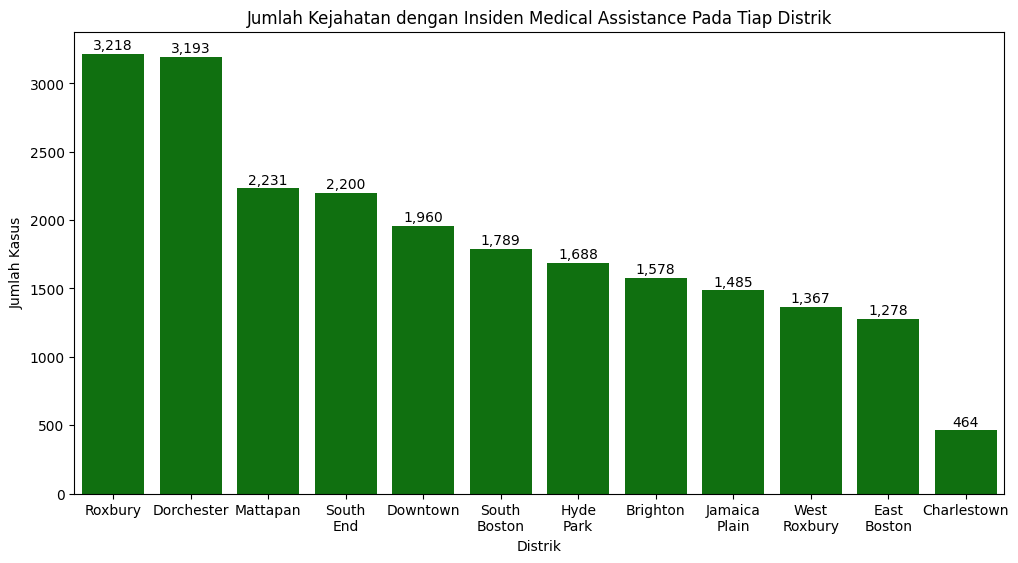

In [ ]:
# membuat countplot
plt.figure(figsize=(12,6))
ax = sns.countplot(data= Medical_Assistance, x='DISTRICT', color='green', order=urutan_distrik)
plt.title(f'Jumlah Kejahatan dengan Insiden Medical Assistance Pada Tiap Distrik')
plt.xlabel(f'Distrik')
plt.ylabel('Jumlah Kasus')
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 1)
distrik = ['Roxbury','Dorchester','Mattapan','South\nEnd','Downtown','South\nBoston','Hyde\nPark','Brighton','Jamaica\nPlain',
 'West\nRoxbury','East\nBoston','Charlestown']
plt.xticks(np.arange(12), distrik);
ax;

Insight:

Berdasarkan rekomendasi sebelumnya diatas, kasus yang membutuhkan bantuan medis paling banyak terjadi di distrik Roxbury yang merupakan distrik dengan jumlah tindak kejahatan terbesar dan kemudian disusul oleh distrik Dorchester

Rekomendasi:
1. Pihak kepolisian bisa lebih meningkatkan kemampuan pertolongan pertama pada distrik Roxbury dan distrik Dorchester, dan tidak terkecuali untuk distrik lainnya.
2. Pihak kepolisian bisa meningkatkan kerjasama dengan beberapa rumah sakit di distrik Roxbury dan distirk Dorchester, serta memastikan bahwa peralatan medis dirumah sakit tersebut lengkap dan memadai.


#### Kapan biasanya tindak kejahatan sering terjadi? 

##### Jumlah Kejahatan Tiap Jam

In [ ]:
# membuat countplot
def countplot_crime(time, judul, urutan, labeling=0) :  
    plt.figure(figsize=(12,6))
    ax = sns.countplot(data=df, x=time, color='green', order=urutan)
    plt.title(f'Jumlah Kejahatan Pada Tiap {judul}')
    plt.xlabel(f'{judul}')
    plt.ylabel('Jumlah Kasus')
    if labeling == 1:
        container = ax.containers[0]
        ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 1)
    return ax

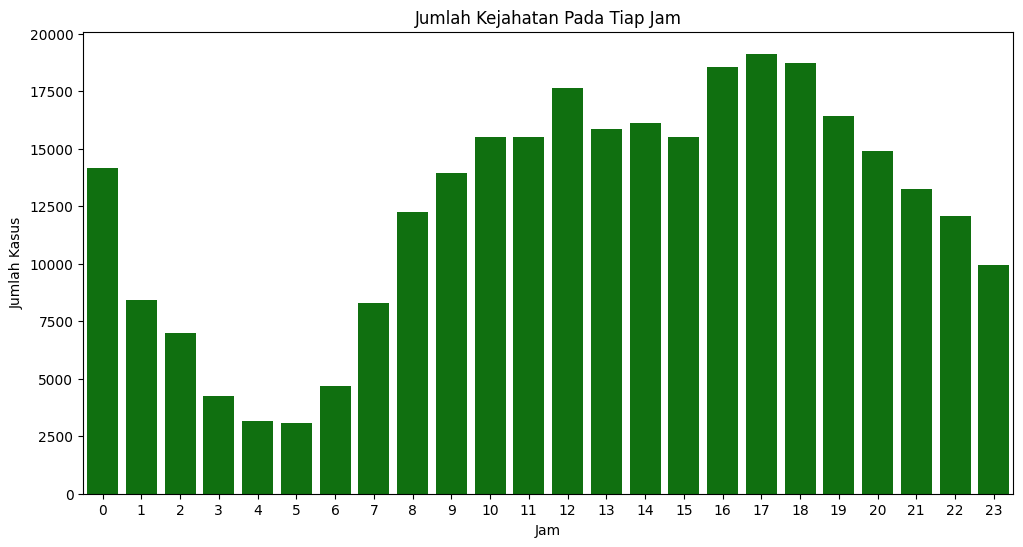

In [ ]:
countplot_crime('HOUR', 'Jam', range(0,24));

Insight
1. Berdasarkan grafik di atas, jumlah kasus tertinggi terjadi pada pukul 16:00 - 18:59 dan yang terendah pada pukul 4:00 - 5:59
2. Dari grafik juga dapat kita asumsikan bahwa jumlah kasus kejahatan cenderung naik dari pukul 6:00 - 17:59 kemudian berangsur turun pada pukul 18:00 turun hingga pukul 05.59.
3. Insiden kejahatan juga nampak tinggi pada pukul 12:00-12:59

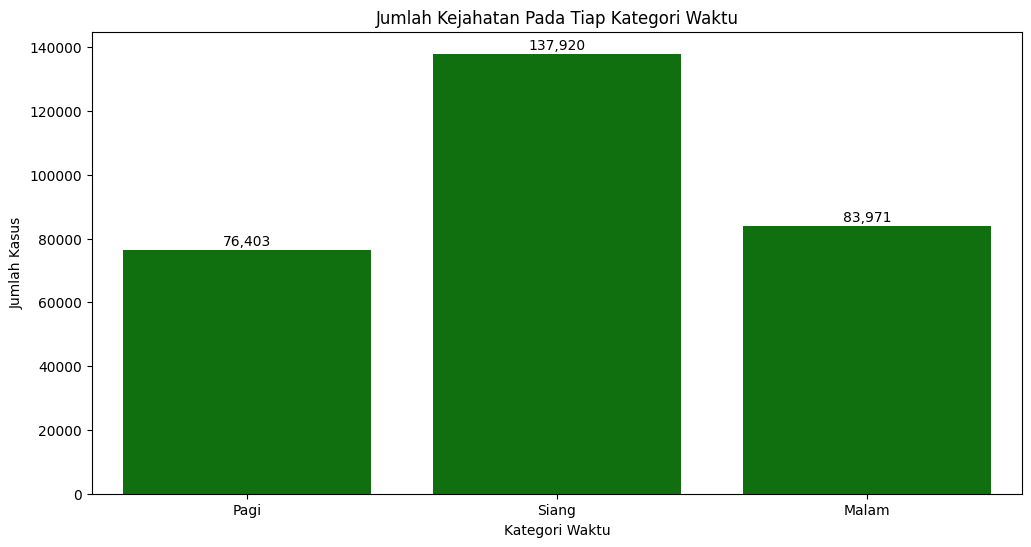

In [ ]:
countplot_crime('TIME', 'Kategori Waktu', ['Pagi', 'Siang', 'Malam'], 1);

Insight:
1. Mendukung data pada jumlah kejahatan per jam di grafik sebelumnya, bahwa pada Siang hari (12:00 - 19:59) jumlah kejahatan meningkat dibandingkan Pagi dan Malam Hari. 
2. kemudian jumlah kejahatan paling rendah terjadi di pagi hari.

Rekomendasi:

Pihak Kepolisian bisa melakukan penambahan jumlah polisi yang patroli diwaktu-waktu tindak kejahatan mengalami kenaikan yaitu pada Siang Hari (12:00-19.59) dimana pada jam tersebut merupakan jam-jam masyarakan melakukan aktifitas diluar rumah. penambahan jumlah polisi tersebut dapat mencegah terjadinya tindakan kejahatan, dimana Pencegahan Kejahatan Situasional (Situasional Crime Prevention) merupakan suatu strategi untuk 
mengurangi meningkatnya resiko kejahatan (Clarke,1995).

##### Periode terjadinya Tindak Kejahatan

In [ ]:
# membuat list urutan bulan dan tahun
order_time = list(pd.to_datetime(df['OCCURRED_ON_DATE'].sort_values()).dt.strftime('%b-%y').unique())

# membuat tabel occured on date dalam format Mm-yy
bulan_tahun = pd.to_datetime(df['OCCURRED_ON_DATE'].sort_values()).dt.strftime('%b-%y').to_frame()
bulan_tahun.head(5)

,OCCURRED_ON_DATE
129056,Jun-15
253464,Jun-15
317446,Jun-15
317447,Jun-15
303001,Jun-15


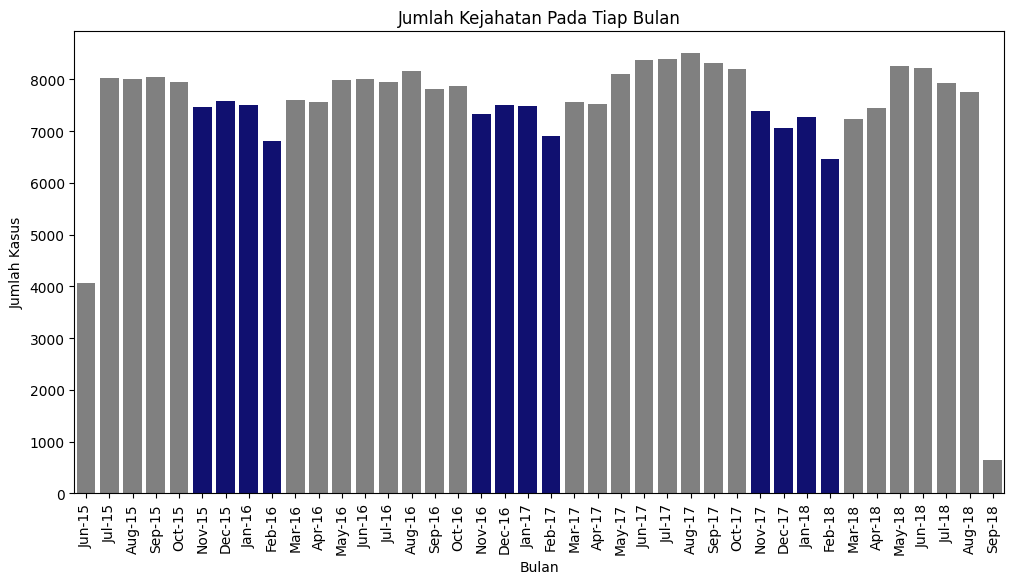

In [ ]:
# membuat countplot perbulan secara series
plt.figure(figsize=(12,6))
my_palette = ['gray', 'gray', 'gray', 'gray', 'gray', 'navy', 'navy', 'navy', 'navy', 'gray', 'gray', 'gray',]
ax = sns.countplot(data=bulan_tahun, x='OCCURRED_ON_DATE', order=order_time, palette=my_palette)
plt.title(f'Jumlah Kejahatan Pada Tiap Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Kasus')
plt.xticks(np.arange(len(order_time)), order_time, rotation=90)
ax;

Insight:
1. Berdasarkan grafik di atas, jumlah kasus terendah pada tiap tahun terjadi pada bulan Februari.
2. Secara umum jumlah kasus kejahatan cenderung bersifat cyclical dimana jumlah kejahatan relatif meningkat pada bulan Maret-Agustus, kemudian cenderung turun pada bulan September - Februari dimana titik terendahnya terjadi di bulan Februari.

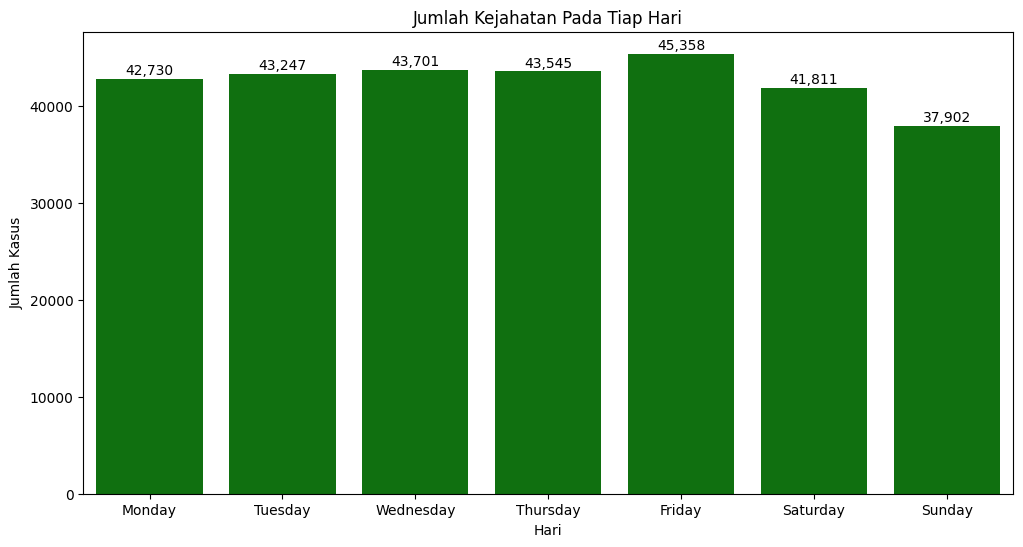

In [ ]:
countplot_crime('DAY_OF_WEEK', 'Hari', ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], 1);

Insight:

Berdasarkan grafik di atas, jumlah kasus tertinggi terjadi pada hari Jumat sedangkan kasus terendah pada terjadi pada hari Minggu.
Jika kita perhatikan jumlah kasus terendah setelah Minggu adalah hari Sabtu, dimana keduanya adalah akhir pekan.

In [ ]:
# membuat tabel yang berisi tanggal, jumlah kasus, dan status pekan (Weekday/Weekend)
kasus_harian = df[['OCCURRED_ON_DATE', 'WEEK']].copy()
kasus_harian['OCCURRED_ON_DATE'] = pd.to_datetime(kasus_harian['OCCURRED_ON_DATE'].sort_values()).dt.strftime('%d %b %y')
df_A = kasus_harian.groupby('OCCURRED_ON_DATE').count().reset_index().rename(columns={'OCCURRED_ON_DATE' : 'Tanggal', 'WEEK' : 'Jumlah Kasus'})
df_B = kasus_harian.groupby('OCCURRED_ON_DATE').max().reset_index().rename(columns={'OCCURRED_ON_DATE' : 'Tanggal', 'WEEK' : 'Pekan'})

kasus_harian = df_A.merge(df_B)
kasus_harian.head()

,Tanggal,Jumlah Kasus,Pekan
0,01 Apr 16,323,Weekday
1,01 Apr 17,278,Weekend
2,01 Apr 18,229,Weekend
3,01 Aug 15,257,Weekend
4,01 Aug 16,298,Weekday


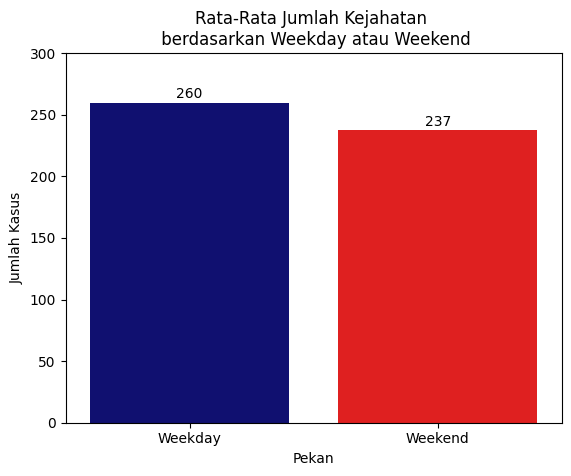

In [ ]:
ax = sns.barplot(data=kasus_harian, x='Pekan', y = 'Jumlah Kasus', ci=0, palette=['navy', 'red'])
plt.title(f'Rata-Rata Jumlah Kejahatan \n berdasarkan Weekday atau Weekend')
container = ax.containers[0]
ax.bar_label(container , labels=[f'{x:,.0f}' for x in container.datavalues], label_type='edge', padding = 1)
plt.yticks(range(0,301,50))
ax;

Insight:

Mendukung grafik sebelumnya, dari grafik diatas kita dapat mengetahui benar bahwa rata-rata tindak kejahatan di weekend cenderung lebih sedikit dibandingkan tindak kejahatan di weeekday.

Rekomendasi:

1. Kepolisian dapat meningkatkan patroli di bulan-bulan dimana kasus kejahatan meningkat, yaitu pada bulan Maret sampai bulan Agustus.
2. kepolisian dapan meningkatkan patroli di weekdays terutama pada hari jumat, karna kasus kajahatan terjadi paling tinggi di hari jumat.

# Kesimpulan dan Rekomendasi

**Kesimpulan**
*   Kejahatan saja apa yang sering terjadi di kota boston?
> * tindakan kejahatan yang paling sering terjadi adalah tindakan kejahatan yang membutuhkan tindakan investigasi dan diikuti kebutuhan bantuan medis yang dilakukan polisi terhadap korban/individu ditempat kejadian. dimana jumlah kasusnya sebanyak 17.885 atau sebesar 6.00% dari total kasus.
> * kemudian disusul oleh tindakan kejahatan dengan pengrusakan properti atau vandalisme sebanyak 14628 kasus, lalu disusul dengan pengrusakan harta benda akibat kecelakaan kendaraan bermotor sebanyak 14.569 kasus.
* Di distrik manakah yang paling banyak terjadi tindakan kejahatan?
> * Distrik Roxbury merupakan distrik dengan jumlah tindak kejahatan terbesar yaitu 15,49% dari total tindak kejahatan
>* Distrik Roxbury juga merupakan distrik dengan kasus yang membutuhkan bantuan medis paling banyak, yang kemudian disusul oleh distrik Dorchester
* Kapan biasanya tindak kejahatan sering terjadi?
> *  Jumlah kasus tertinggi terjadi pada siang hari yaitu pada rentang waktu (12:00 - 19:59).
> *  jumlah kejahatan relatif meningkat pada bulan Maret-Agustus
> *  rata-rata tindak kejahatan di weekday cenderung lebih tinggi dibandingkan tindak kejahatan di weekend, teruma pada hari jumat, kejahatan cenderung meningkat.

**Rekomendasi**

1. Memberikan pelatihan Pertolongan Pertama pada polisi yang berjaga agar polisi yang datang terlebih dahulu ke lokasi dapat memberikan pertolongan pertama terhadap korban/individu yang mungkin dapat menentukan keselamatan korban.
2. Pihak Kepolisian berkoordinasi dengan beberapa Rumah sakit terdekat dimana tindakan kriminal yang membutuhkan bantuan medis sering terjadi yaitu di distrik Roxbury dan distirk Dorchester, serta memastikan bahwa peralatan medis dirumah sakit tersebut lengkap dan memadai.
3. Pihak Kepolisian bisa melakukan penambahan jumlah polisi yang patroli diwaktu-waktu tindak kejahatan mengalami kenaikan yaitu pada Siang Hari (12:00-19.59), terutama pada weekdays di hari jumat. selain itu kepolisian juga bisa menambah perhatian pada bulan Maret-Agustus karena dibulan tersebut kasus kejahatan cenderung meningkat. Penambahan jumlah polisi tersebut dapat mencegah terjadinya tindakan kejahatan, dimana Pencegahan Kejahatan Situasional (Situasional Crime Prevention) merupakan suatu strategi untuk mengurangi meningkatnya resiko kejahatan (Clarke,1995).
